In [375]:
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
from math import ceil
from pprint import pprint

In [376]:
file_data = [float(line.rstrip('\n')) for line in open('6_1.txt', 'r')]

In [377]:
broken_pc = file_data[1:]  # время, когда ломаются компьютеры

In [378]:
t_0 = 1
t = 60

Заметим, что $E(N_t|N_s) = E(N_t - N_s + N_s|N_s) = E(N_t-N_s)+N_s$, ибо $N_t-N_s$ и $N_s$ независимы по условию, а $N_s$, безусловно, является $N_s$ - измеримой случайной величиной. $E(N_t-N_s) = \lambda(t-s) \implies E(N_t|N_s) = \lambda(t-s) + N_s$

In [379]:
def time_expectation(Ns, s, t, lambd):  #подсчет условного мат. ожидания
    return lambd * (t - s) + Ns

Для распределения $exp(\lambda)$ сопряженным будет гамма распределение $\Gamma(a, b)$. В таком случае оценка $\hat{\lambda} = \frac{a+n-1}{b+ n\overline{X}}$



In [380]:
Определим, какие параметры гамма распределения нам подойдут лучше всего

SyntaxError: invalid syntax (<ipython-input-380-a4ee1f4fb86d>, line 1)

In [381]:
def draw_gamma_pdf(a, b):
    grid = np.arange(0.01, 10, 0.01)
    plt.figure(figsize=(15, 9))
    plt.title(r'$\Gamma(a, b)$ PDF. a = {:}, b = {:}'.format(a, b))
    plt.plot(grid, stats.gamma.pdf(grid, a, scale=1/b), label=r'\Gamma(a, b)')
    plt.show()

In [382]:
def draw_broken_pc_estimating_timeline(a, b):
    grid = np.arange(0.01, 10, 0.01)
    plt.figure(figsize=(10, 6))
    plt.title(r'Crashes of PC. a = {:}, b = {:}'.format(a, b))
#     plt.plot(grid, stats.gamma.pdf(grid, a, scale=1/b), label=r'\Gamma(a, b)')
    d = stats.expon.rvs(stats.gamma.rvs(a, scale=a/b, size=1), size=20)
    data = [d[0]]
    for xi in d:
        data.append(data[len(data) - 1] + xi)
    plt.ylabel(r'time')
    plt.xlabel(r'# crashed pc')
    plt.plot(data, label=r'estimated')
    plt.plot(broken_pc, label=r'original (from text file)')
    plt.legend(loc='best')
    plt.show()

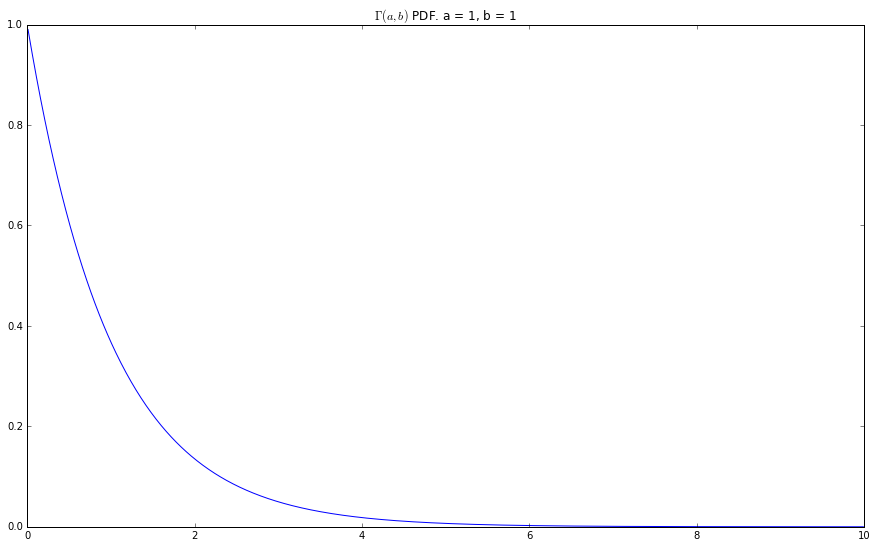

In [383]:
draw_gamma_pdf(1, 1)

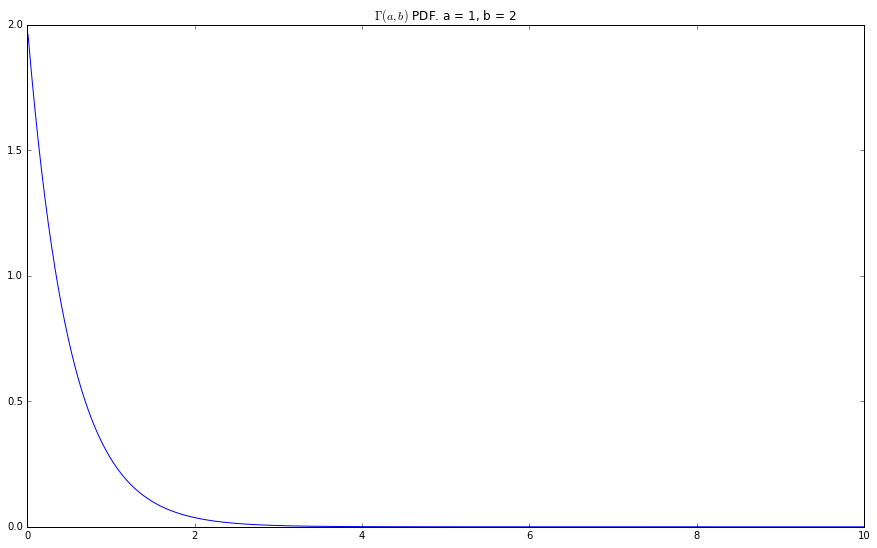

In [384]:
draw_gamma_pdf(1, 2)


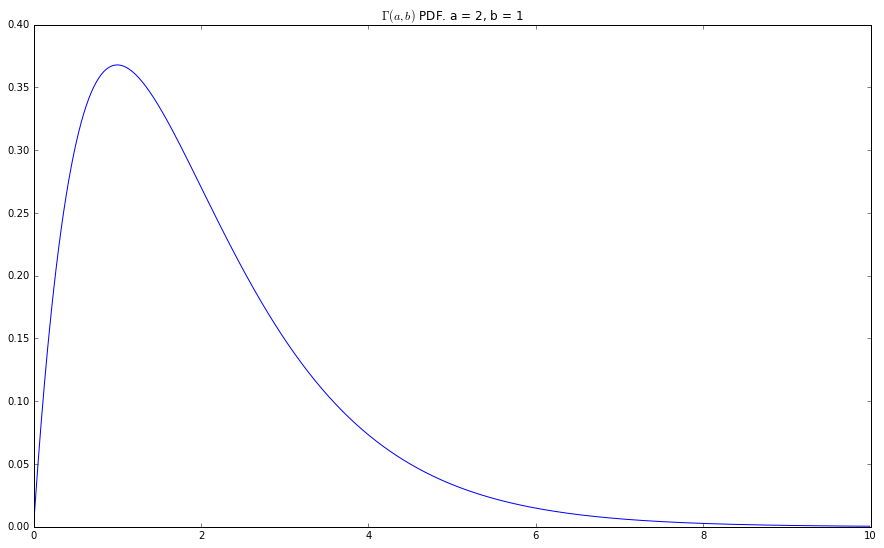

In [385]:
draw_gamma_pdf(2, 1)


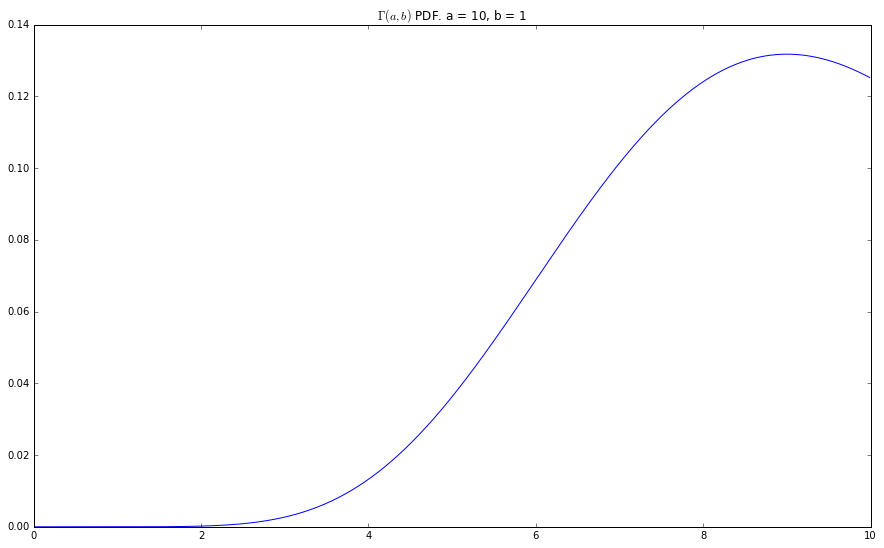

In [386]:
draw_gamma_pdf(10, 1)

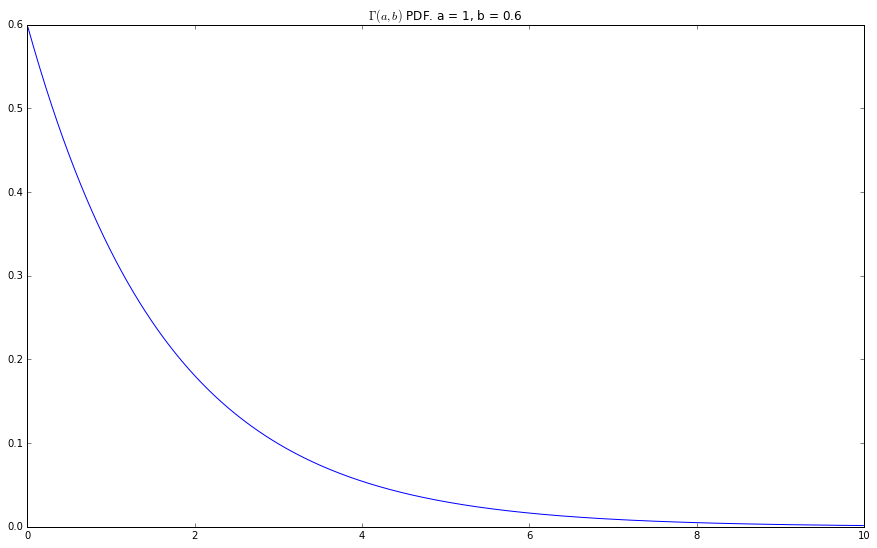

In [387]:
draw_gamma_pdf(1, 0.6)  # выглядит довольно неплохо, он сглаженный и нет явных пиков

Поскольку при $a$ ≥ 2 у гамма распределения появляется характерный пик, то целесообразно выбрать $a=1$. Чтобы график функции распределения $\Gamma(1, b)$ был сглаженный, возьмем $b=0.6$ (Имперически проверено, что результат почти не меняется при изменении $b$ в диапазоне от 0.1 до 1.0)

Стало любопытно, действительно ли можно так апроксимировать. На след. графиках изображена зависимость количества   сломанных компьютеров от времени. Из них видно, что отклонение при такой оценке есть как в большую, так и в меньшую сторону, однако оно не очень велико.

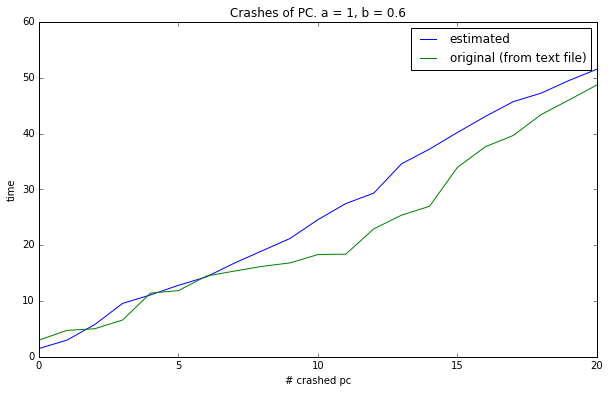

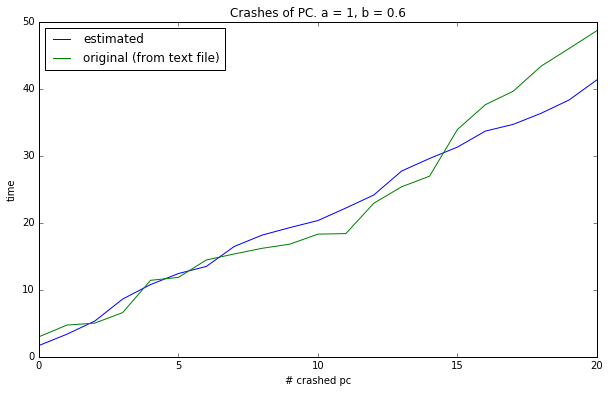

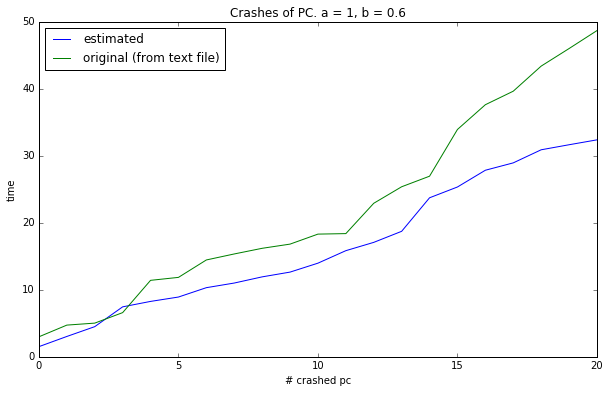

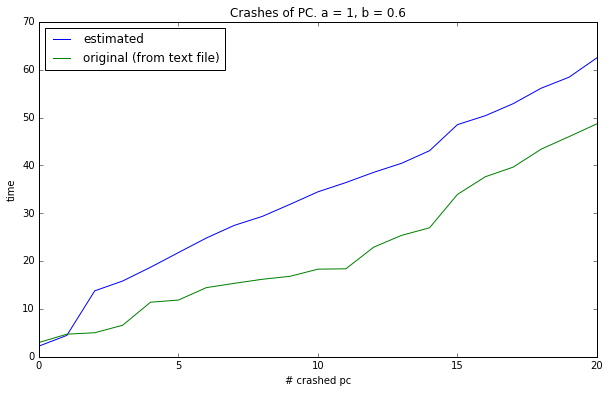

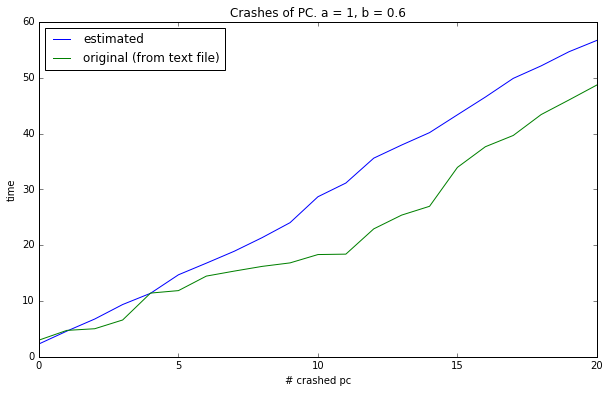

In [388]:
for i in range(5):
    draw_broken_pc_estimating_timeline(1, 0.6)

$\hat{\lambda} = \frac{a+n-1}{b+ n\overline{X}}$

In [389]:
a = 1
b = 0.6
def estimate_lambda(sample):
    return (a + len(sample) - 1) / (b + np.sum(sample))

#### Смоделируем предсказания:

In [390]:
Ns = 0
broken_pc_id = 0
xi_sample = []
for current_time in range(0, t+1, t_0):
    while broken_pc_id < len(broken_pc) and broken_pc[broken_pc_id] < current_time:
        xi_sample.append(broken_pc[broken_pc_id])
        Ns += 1
        broken_pc_id += 1
    lambd = estimate_lambda(xi_sample)
    print("Current time: " + str(current_time) + " Expecting value of PC: " + str(ceil(time_expectation(Ns, current_time, t, lambd))) + " lambda = " + str(lambd))
    #количество компьютеров будем округлять вверх с помощью функции ceil
    

Current time: 0 Expecting value of PC: 0 lambda = 0.0
Current time: 1 Expecting value of PC: 0 lambda = 0.0
Current time: 2 Expecting value of PC: 0 lambda = 0.0
Current time: 3 Expecting value of PC: 17 lambda = 0.278629144609
Current time: 4 Expecting value of PC: 17 lambda = 0.278629144609
Current time: 5 Expecting value of PC: 16 lambda = 0.240297969482
Current time: 6 Expecting value of PC: 16 lambda = 0.224668613795
Current time: 7 Expecting value of PC: 15 lambda = 0.200491203448
Current time: 8 Expecting value of PC: 15 lambda = 0.200491203448
Current time: 9 Expecting value of PC: 15 lambda = 0.200491203448
Current time: 10 Expecting value of PC: 15 lambda = 0.200491203448
Current time: 11 Expecting value of PC: 14 lambda = 0.200491203448
Current time: 12 Expecting value of PC: 13 lambda = 0.138789294719
Current time: 13 Expecting value of PC: 13 lambda = 0.138789294719
Current time: 14 Expecting value of PC: 13 lambda = 0.138789294719
Current time: 15 Expecting value of PC: 1

Посмотрим, когда были сломаны компьютеры:

In [391]:
pprint(broken_pc)

[2.989,
 4.734,
 5.03,
 6.598,
 11.419,
 11.861,
 14.463,
 15.359,
 16.203,
 16.829,
 18.323,
 18.398,
 22.927,
 25.394,
 26.972,
 33.95,
 37.646,
 39.666,
 43.411,
 46.034,
 48.716]


Предсказания с оценкой лямбда менее точны, однако при поломке последнего компьютера дают правильный ответ заметно раньше, чем в задаче с известным $\lambda$